### Мысли

на вход 
- "картинки" сопротивлений прямоугольные (размер задать строго)
- картинка - двумерный массив: где в каждой клетке - значение сопротивления в абсолютных еденицах

на выход
- картинка такого же размера
- каждая ячейка - число от 0 до N-1, где N - число возможных пород в обучении и тесте

что нужно утвердить:
- число классов (пород с которыми работаем)
- соответствие строгое между названием породы и номером класса
- размеры входных и выходных "изображений"


сейчас есть:
- 

бакалаварский
                        "Инверсия"?          нейронка
результаты электроразведки -> входные данные -> модель грунта

магисторский 
                        нейронка
результаты электроразведки -> модель грунта


                       [               Нейронка                  ]
                       Инверсия                 Интерпритация(Дед)
результаты электроразведки -> кажущееся сопротивление -> модель грунта

           Прямая задача
модель грунта -> результаты электроразведки


вопросы:
1) число строк в dat файле постоянно? чем обсуловлено?
2) минимальное и максимально значения x в dat файле для всех файлов одинаковое? (размеры измеряемой территории каковы?)
3) 

обсидть:
- одинаковые числа на вход - плохо, модель будет учиться их игнорировать
- 

-100.000 0.000 -85.000 0.000 -80.000 0.000 -> x, y на матрице конкретного размера
x_min, x_max, z_min, z_max, y'_min=0, y'_max

                                                  нормируем
                входные                              ->                                 обработанные входные
x_min, x_max, z_min, z_max, y'_min=0, y'_max                координаты в массиве от 0, 0 до N, M - надо подбирать: но я бы взял 300 / 600




НИКАКОГО RGB!!!

выходная картинка - выражение для геев ебаных
предсказываемая матрица - кайф для ровных

мы хотим иметь на выходе двумерную матрицу, где в каждой ячейке будет записана величина споротивления



In [12]:
import numpy as np

# тут 3 на 3, а тебе надо 300 на 600
output_matrix = [
    [100, 100, 100],
    [100, 900, 200],
    [300, 1000, 100],
]

output_matrix = np.array(output_matrix)

np.savez('output_matrix.npz', image=output_matrix)


In [13]:
{
    "output_matrix": output_matrix
}

{'output_matrix': array([[ 100,  100,  100],
        [ 100,  900,  200],
        [ 300, 1000,  100]])}

In [14]:
data = np.load('output_matrix.npz')
output_matrix_loaded = data['image']
print(output_matrix_loaded)

[[ 100  100  100]
 [ 100  900  200]
 [ 300 1000  100]]


In [1]:
# Iternet pipeline notebook (no business logic)

from pathlib import Path

from iternet.config import DataConfig, GridConfig, ModelConfig, TrainConfig
from iternet.pipeline import (
    analyze_sample,
    init_model,
    open_training_data,
    predict_untrained,
    preprocess_data,
    train_model,
)

In [9]:

DATA = DataConfig(
    ie2d_res_path=Path(r"C:\\Max\\Proga\\IVAN\\data\\raw\\ie2d_res.dat"),
    ie2_model_path=Path(r"C:\\Max\\Proga\\IVAN\\data\\raw\\ie2dp_Mod Alex 7(7) Hard.ie2"),
    value_kind="voltage",  # auto|voltage|resistance|rho_a
    current_a=1.0,  # set injection current here (A)
)

GRID = GridConfig(
    look_nx=256,
    look_nz=128,
)

MODEL = ModelConfig(
    num_classes=0,  # auto from data
)

TRAIN = TrainConfig(
    epochs=20,
    batch_size=4,
    device="cuda",  # change to "cpu" if needed
    log_dir=Path(r"C:\\Max\\Proga\\IVAN\\iternet\\runs"),
)


In [3]:
raw = open_training_data(DATA)
raw

RawData(ie2d=IE2DResData(sys_path='C:\\Users\\\\Downloads\\Telegram Desktop\\1-2.txt', electrode_spacing=2.5, measurement_type=0, measurements=(IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-85.0, zm=0.0, xn=-80.0, zn=0.0, value=45.6080589294434, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-75.0, zm=0.0, xn=-70.0, zn=0.0, value=47.8940887451172, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-65.0, zm=0.0, xn=-40.0, zn=0.0, value=50.5034866333008, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-60.0, zm=0.0, xn=-35.0, zn=0.0, value=50.9668960571289, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-55.0, zm=0.0, xn=-30.0, zn=0.0, value=51.3033447265625, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-50.0, zm=0.0, xn=-25.0, zn=0.0, value=51.5438461303711, b_infinite=True), IE2DMeasurement(xa=-100.0, za=0.0, xb=None, zb=None, xm=-20.0, zm=0.0,

In [4]:
prep = preprocess_data(raw, GRID)
prep.sample.meas_tokens.shape, prep.sample.target_mask.shape, prep.sample.num_classes

(torch.Size([1578, 18]), torch.Size([128, 256]), 10)

Figures(mask_fig=<Figure size 1000x400 with 2 Axes>, meas_fig=<Figure size 1000x400 with 2 Axes>, pred_fig=None, rho_fig=<Figure size 1000x400 with 2 Axes>)

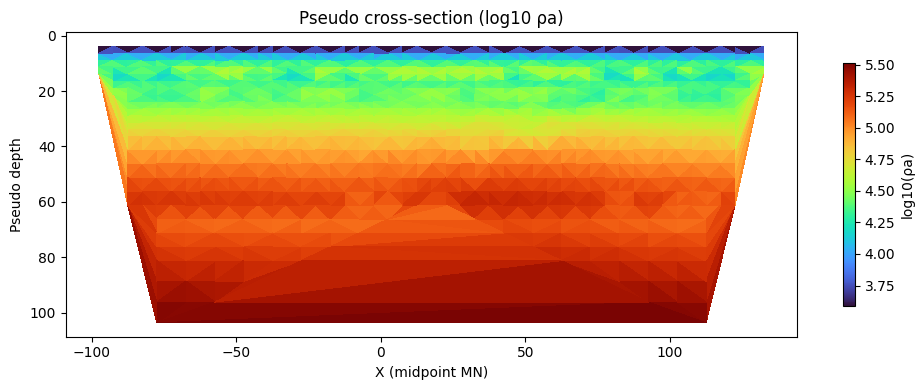

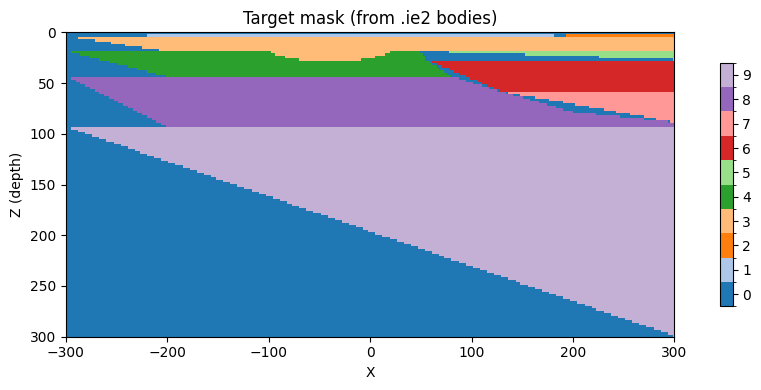

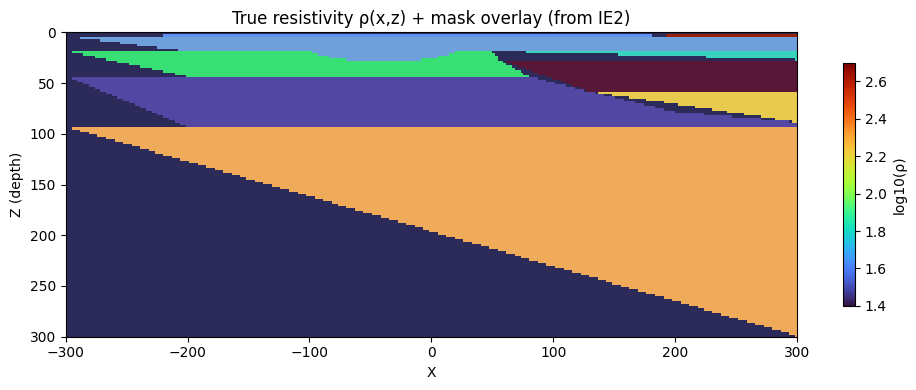

In [5]:
figs = analyze_sample(prep, raw)
figs

In [10]:
model = init_model(prep, MODEL)
model

IternetPerceiver(
  (token_proj): Sequential(
    (0): Linear(in_features=18, out_features=64, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=64, out_features=128, bias=True)
  )
  (encoder_layers): ModuleList(
    (0-3): 4 x CrossAttentionBlock(
      (q_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (kv_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
      )
      (ff): FeedForward(
        (net): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): Linear(in_features=128, out_features=512, bias=True)
          (2): GELU(approximate='none')
          (3): Dropout(p=0.1, inplace=False)
          (4): Linear(in_features=512, out_features=128, bias=True)
          (5): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (query_mlp): Sequential(
    

Figures(mask_fig=<Figure size 1000x400 with 2 Axes>, meas_fig=<Figure size 1000x400 with 2 Axes>, pred_fig=<Figure size 1000x400 with 2 Axes>, rho_fig=<Figure size 1000x400 with 2 Axes>)

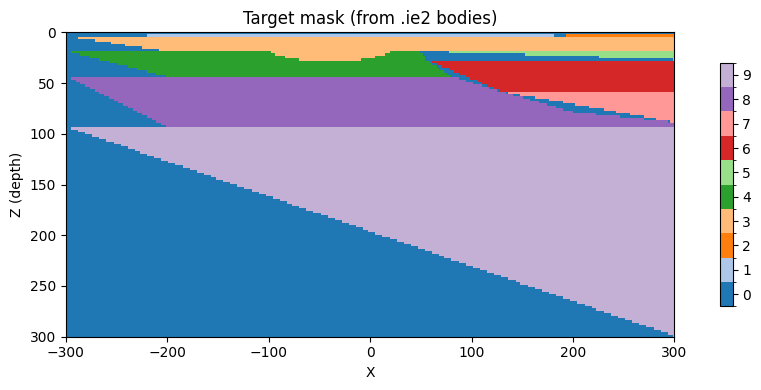

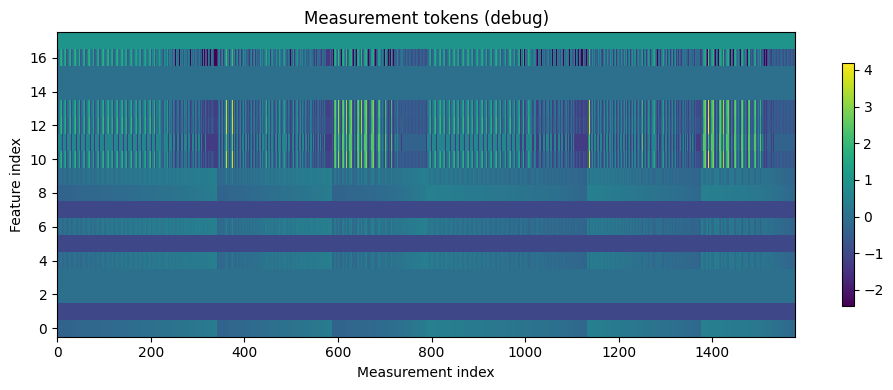

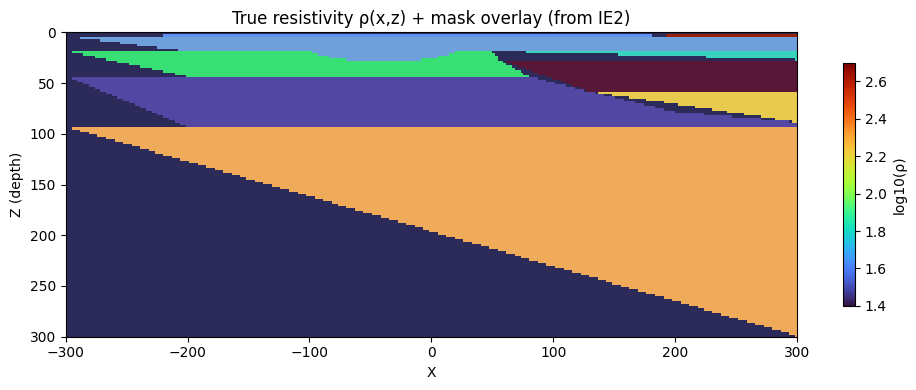

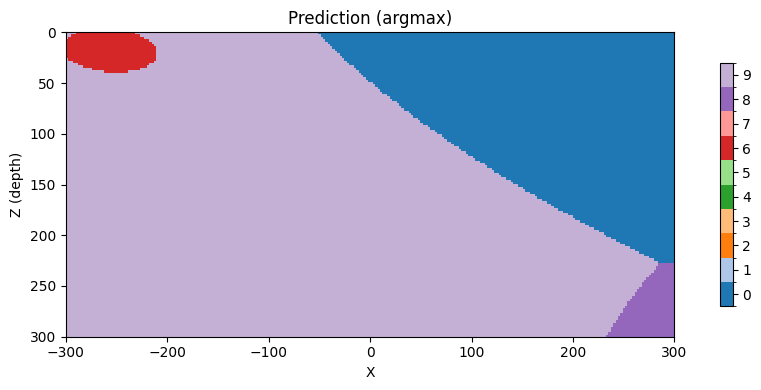

In [7]:
pred, pred_figs = predict_untrained(model, prep, device=TRAIN.device)
pred_figs

In [11]:
TRAIN

TrainConfig(batch_size=4, epochs=20, lr=0.0003, weight_decay=0.0001, device='cuda', log_dir=WindowsPath('C:/Max/Proga/IVAN/iternet/runs'), ignore_index=0, boundary_weight_factor=3.0, boundary_weight_radius=4, ce_weight=3.0, dice_weight=0.3, boundary_loss_weight=0.3, log_every_steps=10)

In [21]:
prep.sample.target_mask.shape

torch.Size([128, 256])

In [ ]:
history = train_model(model, prep, TRAIN)
history

In [ ]:
from iternet.pipeline import export_ie2_from_prediction

# Export an IE2 model from the latest prediction mask.
# You can export `pred` (untrained) or a prediction after training.

out_ie2 = export_ie2_from_prediction(
    pred_mask=pred,
    prep=prep,
    template_ie2_path=DATA.ie2_model_path,
    out_path=Path(r"C:\\Max\\Proga\\IVAN\\data\\outputs\\predicted_from_model.ie2"),
    min_area_cells=100,  # increase to drop tiny islands
    simplify_step=5,     # increase to make polygons smaller
)

out_ie2

In [ ]:
pred, pred_figs = predict_untrained(model, prep, device=TRAIN.device)
pred_figs

## TensorBoard

Запуск (в терминале):

```bash
python -m tensorboard.main --logdir "C:\\Max\\Proga\\IVAN\\iternet\\runs"
```

Открой в браузере `http://localhost:6006`.

---
# Batch pipeline (train/test на большом датасете)

Путь к данным: `data/processed/` — train и test папки.

In [ ]:
# 1. Config для batch pipeline
from pathlib import Path
from torch.utils.data import DataLoader

from iternet.config import GridConfig, ModelConfig, TrainConfig
from iternet.data_discovery import discover_train_test
from iternet.dataset import IternetDataset, collate_batch, collate_single
from iternet.preprocessing import preprocess_pair

DATA_DIR = Path(r"C:\Max\Proga\IVAN\data\processed")
GRID_BATCH = GridConfig(
    look_nx=256,
    look_nz=128,
    x_min=-300.0,
    x_max=300.0,
    z_min=0.0,
    z_max=150.0,
)
MODEL_BATCH = ModelConfig(num_classes=0)
TRAIN_BATCH = TrainConfig(epochs=20, batch_size=4, device="cuda", log_dir=Path("iternet/runs"), boundary_weight_radius=10)

In [ ]:
# 2. Discover train/test pairs
train_pairs, test_pairs = discover_train_test(DATA_DIR)
print(f"Train: {len(train_pairs)} пар, Test: {len(test_pairs)} пар")
train_pairs[:3] if train_pairs else None

In [ ]:
# 3. Infer num_classes, in_features and create datasets
from iternet.io import parse_ie2_model, parse_ie2d_res

grid_overrides = {
    "x_min": GRID_BATCH.x_min,
    "x_max": GRID_BATCH.x_max,
    "z_min": GRID_BATCH.z_min,
    "z_max": GRID_BATCH.z_max,
}
max_classes, max_in_mask, in_features = 0, 0, 0
for sp in train_pairs:
    ie2d = parse_ie2d_res(sp.ie2d_res)
    ie2 = parse_ie2_model(sp.ie2_model)
    prep = preprocess_pair(ie2d=ie2d, ie2=ie2, nx=GRID_BATCH.look_nx, nz=GRID_BATCH.look_nz, grid_overrides=grid_overrides)
    max_classes = max(max_classes, prep.num_classes)
    max_in_mask = max(max_in_mask, int(prep.target_mask.max()))
    if in_features == 0:
        in_features = int(prep.meas_tokens.shape[1])
num_classes = max(max_classes, max_in_mask + 1, 2)
print(f"num_classes={num_classes}, in_features={in_features}")

In [ ]:
# 4. Create datasets and loaders
train_ds = IternetDataset(samples=train_pairs, nx=GRID_BATCH.look_nx, nz=GRID_BATCH.look_nz, grid_overrides=grid_overrides)
test_ds = IternetDataset(samples=test_pairs, nx=GRID_BATCH.look_nx, nz=GRID_BATCH.look_nz, grid_overrides=grid_overrides)

# Train: shuffle=True — каждый эпоху сэмплы в случайном порядке
train_loader = DataLoader(train_ds, batch_size=TRAIN_BATCH.batch_size, shuffle=True, collate_fn=collate_batch if TRAIN_BATCH.batch_size > 1 else collate_single, num_workers=0)
# Test: shuffle=False — прогон один раз, фиксированный порядок
val_loader = DataLoader(test_ds, batch_size=1, shuffle=False, collate_fn=collate_single, num_workers=0) if test_pairs else None

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader) if val_loader else 0}")

In [ ]:
# 5. Init model
from iternet.model import IternetPerceiver

model_batch = IternetPerceiver(
    in_features=in_features,
    token_dim=MODEL_BATCH.token_dim,
    latent_dim=MODEL_BATCH.latent_dim,
    num_latents=MODEL_BATCH.num_latents,
    num_layers=MODEL_BATCH.num_layers,
    num_heads=MODEL_BATCH.num_heads,
    num_classes=num_classes,
    dropout=MODEL_BATCH.dropout,
)
model_batch

In [ ]:
# 6. Train with validation (картинки сохраняются рядом с TF логами в val_images/epoch_XXXX/)
from iternet.train import train_segmentation

config_dict = {f"train_{k}": v for k, v in TRAIN_BATCH.__dict__.items()}
config_dict.update({"grid_nx": GRID_BATCH.look_nx, "grid_nz": GRID_BATCH.look_nz})
history_batch = train_segmentation(
    model=model_batch,
    loader=train_loader,
    epochs=TRAIN_BATCH.epochs,
    lr=TRAIN_BATCH.lr,
    weight_decay=TRAIN_BATCH.weight_decay,
    device=TRAIN_BATCH.device,
    log_dir=TRAIN_BATCH.log_dir,
    val_loader=val_loader,
    boundary_weight_factor=TRAIN_BATCH.boundary_weight_factor,
    boundary_weight_radius=TRAIN_BATCH.boundary_weight_radius,
    ce_weight=TRAIN_BATCH.ce_weight,
    dice_weight=TRAIN_BATCH.dice_weight,
    boundary_loss_weight=TRAIN_BATCH.boundary_loss_weight,
    config_dict=config_dict,
)
print(f"Final train miou: {history_batch.miou[-1]:.4f}")
if history_batch.val_miou:
    print(f"Final val miou: {history_batch.val_miou[-1]:.4f}")

In [ ]:
# 7. Графики Loss и IoU (train & val)
import matplotlib.pyplot as plt
import numpy as np

steps = len(history_batch.losses)
bp = len(train_loader)
n_epochs = (steps + bp - 1) // bp
train_loss_ep = [np.mean(history_batch.losses[e*bp:(e+1)*bp]) for e in range(n_epochs) if (e+1)*bp <= steps]
train_miou_ep = [np.mean(history_batch.miou[e*bp:(e+1)*bp]) for e in range(n_epochs) if (e+1)*bp <= steps]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
ax1.plot(train_loss_ep, "b-", label="train")
if history_batch.val_losses:
    ax1.plot(history_batch.val_losses, "g-", label="val")
ax1.set_xlabel("Epoch"); ax1.set_ylabel("Loss"); ax1.legend(); ax1.grid(True, alpha=0.3)
ax2.plot(train_miou_ep, "b-", label="train")
if history_batch.val_miou:
    ax2.plot(history_batch.val_miou, "g-", label="val")
ax2.set_xlabel("Epoch"); ax2.set_ylabel("mIoU"); ax2.legend(); ax2.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

In [ ]:
# 8. Предсказание на тестовом примере (после обучения)
from iternet.pipeline import predict_mask
from iternet.viz import plot_target_vs_prediction

# Берём первый тестовый сэмпл
meas_tokens, grid_xy, target_mask, meta = test_ds[0]
# prep-подобный объект для predict_mask
class _FakePrep:
    class _Sample:
        pass
    sample = _Sample()
prep_test = _FakePrep()
prep_test.sample.meas_tokens = meas_tokens
prep_test.sample.grid_xy = grid_xy
prep_test.sample.target_mask = target_mask
prep_test.sample.num_classes = meta["num_classes"]

pred_test = predict_mask(model_batch, prep_test, device=TRAIN_BATCH.device)
fig = plot_target_vs_prediction(target_mask.numpy(), pred_test, num_classes=meta["num_classes"], title="Test sample: Target vs Prediction")
fig

In [ ]:
# 9. Сохранить модель и экспорт в .ie2
import torch

ckpt_path = TRAIN_BATCH.log_dir / "model_batch.pt"
torch.save({"model": model_batch.state_dict(), "num_classes": num_classes, "in_features": in_features}, ckpt_path)
print(f"Model saved: {ckpt_path}")

# Экспорт предсказания в .ie2
from iternet.export_ie2 import export_prediction_to_ie2, ExportConfig

template_ie2 = test_pairs[0].ie2_model
out_ie2 = Path(r"C:\Max\Proga\IVAN\data\outputs\predicted_batch.ie2")
out_ie2.parent.mkdir(parents=True, exist_ok=True)
export_prediction_to_ie2(
    pred_mask=pred_test,
    x_coords=meta["x_coords"],
    z_coords=meta["z_coords"],
    class_rho=meta["class_rho"],
    template_ie2_path=template_ie2,
    out_path=out_ie2,
    config=ExportConfig(min_area_cells=50, simplify_step=5),
)
print(f"Exported: {out_ie2}")

**TensorBoard** (графики train/val + картинки валидации в реальном времени):
```bash
tensorboard --logdir iternet/runs
```
Картинки валидации сохраняются рядом с логами: `iternet/runs/YYYY-MM-DD_HH-MM-SS/val_images/epoch_0000/`, `epoch_0001/`, ...

In [ ]:
# 10. Пример инференса из готового чекпоинта на одной паре + все основные метрики
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import torch

from iternet.config import DataConfig, GridConfig, ModelConfig
from iternet.pipeline import open_training_data, preprocess_data, init_model, predict_mask
from iternet.viz import plot_target_vs_prediction

# 1) Явно задаем пути до входного (.dat), ожидаемого выхода (.ie2) и чекпоинта
INPUT_DAT_PATH = Path(r"C:\Max\Proga\IVAN\data\processed\test\electrical_resistivity_tomography\224.dat")
TARGET_IE2_PATH = Path(r"C:\Max\Proga\IVAN\data\processed\test\models\224.ie2")
CHECKPOINT_PATH = Path(r"C:\Max\Proga\IVAN\iternet\runs\model_batch.pt")
print(f"Using files:\n  dat={INPUT_DAT_PATH}\n  ie2={TARGET_IE2_PATH}\n  ckpt={CHECKPOINT_PATH}")

# 2) Локальные конфиги для независимого запуска этой ячейки
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_INFER_CFG = ModelConfig(num_classes=0)
GRID_INFER_CFG = GridConfig(
    look_nx=256,
    look_nz=128,
    x_min=-300.0,
    x_max=300.0,
    z_min=0.0,
    z_max=150.0,
)

if not INPUT_DAT_PATH.exists():
    raise FileNotFoundError(f"Input .dat not found: {INPUT_DAT_PATH}")
if not TARGET_IE2_PATH.exists():
    raise FileNotFoundError(f"Target .ie2 not found: {TARGET_IE2_PATH}")
if not CHECKPOINT_PATH.exists():
    raise FileNotFoundError(f"Checkpoint not found: {CHECKPOINT_PATH}")

# 3) Препроцессинг входа/ожидания
one_data_cfg = DataConfig(
    ie2d_res_path=INPUT_DAT_PATH,
    ie2_model_path=TARGET_IE2_PATH,
)
raw_one = open_training_data(one_data_cfg)
prep_one = preprocess_data(raw_one, GRID_INFER_CFG)

# 4) Инициализация модели + загрузка весов из чекпоинта
model_infer = init_model(prep_one, MODEL_INFER_CFG, checkpoint_path=CHECKPOINT_PATH, strict=True)

# 5) Инференс
pred_mask = predict_mask(model_infer, prep_one, device=DEVICE)
true_mask = prep_one.sample.target_mask.numpy().astype(np.int64)

# 6) Сравнение предсказания и эталона
fig = plot_target_vs_prediction(
    true_mask,
    pred_mask,
    num_classes=prep_one.sample.num_classes,
    title="Single pair: Target vs Prediction",
)
plt.show()

# 7) Метрики (по valid-области: target != 0)
def _calc_seg_metrics(pred: np.ndarray, target: np.ndarray, num_classes: int, ignore_index: int = 0) -> dict:
    valid = target != ignore_index
    pred_v = pred[valid]
    tgt_v = target[valid]

    if pred_v.size == 0:
        return {
            "pixel_accuracy": 0.0,
            "macro_precision": 0.0,
            "macro_recall": 0.0,
            "macro_f1": 0.0,
            "mean_iou": 0.0,
            "mean_dice": 0.0,
            "per_class": {},
        }

    pixel_acc = float((pred_v == tgt_v).mean())

    per_class = {}
    precision_list, recall_list, f1_list, iou_list, dice_list = [], [], [], [], []

    for c in range(num_classes):
        if c == ignore_index:
            continue

        p = pred_v == c
        t = tgt_v == c

        tp = int((p & t).sum())
        fp = int((p & ~t).sum())
        fn = int((~p & t).sum())

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = (2 * precision * recall) / (precision + recall + 1e-9)
        iou = tp / (tp + fp + fn + 1e-9)
        dice = (2 * tp) / (2 * tp + fp + fn + 1e-9)

        per_class[c] = {
            "precision": float(precision),
            "recall": float(recall),
            "f1": float(f1),
            "iou": float(iou),
            "dice": float(dice),
            "support": int(t.sum()),
        }

        # Include class in macro only if class exists in target on this sample.
        if int(t.sum()) > 0:
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
            iou_list.append(iou)
            dice_list.append(dice)

    return {
        "pixel_accuracy": pixel_acc,
        "macro_precision": float(np.mean(precision_list)) if precision_list else 0.0,
        "macro_recall": float(np.mean(recall_list)) if recall_list else 0.0,
        "macro_f1": float(np.mean(f1_list)) if f1_list else 0.0,
        "mean_iou": float(np.mean(iou_list)) if iou_list else 0.0,
        "mean_dice": float(np.mean(dice_list)) if dice_list else 0.0,
        "per_class": per_class,
    }


metrics = _calc_seg_metrics(pred_mask, true_mask, num_classes=prep_one.sample.num_classes, ignore_index=0)

print("\n=== Aggregate metrics (ignore_index=0) ===")
print(f"Pixel Acc      : {metrics['pixel_accuracy']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")
print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Mean IoU       : {metrics['mean_iou']:.4f}")
print(f"Mean Dice      : {metrics['mean_dice']:.4f}")

print("\n=== Per-class metrics ===")
for cls_id, vals in metrics["per_class"].items():
    if vals["support"] == 0:
        continue
    print(
        f"class={cls_id:2d} | support={vals['support']:6d} | "
        f"IoU={vals['iou']:.4f} | Dice={vals['dice']:.4f} | "
        f"P={vals['precision']:.4f} R={vals['recall']:.4f} F1={vals['f1']:.4f}"
    )